
# Estadística Descriptiva e Inferencia para Data Science

**Objetivo del notebook:**  
Entender cómo **resumir datos**, **medir variabilidad**, **calcular intervalos de confianza** y hacer una **regresión lineal simple**, con explicaciones claras y ejemplos sencillos.

## Índice
1. Estadística descriptiva: media, mediana, moda
2. Dispersión: varianza y desviación estándar
3. Visualización: histogramas y diagramas de dispersión
4. Muestra vs población e intervalos de confianza de la media
5. Correlación
6. Regresión lineal simple (OLS)
7. Ejercicios sencillos



## 1. Estadística descriptiva: media, mediana, moda

Cuando tenemos muchos datos, necesitamos **resumirlos** con unos pocos números clave.

- **Media**: promedio. Suma de todos los valores dividida por el número de datos.
- **Mediana**: valor central cuando ordenas los datos.
- **Moda**: valor que más se repite.

En Data Science, estos valores ayudan a entender el "centro" de la distribución, detectar sesgos, etc.


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creamos una muestra de "salarios" (en miles de euros)
rng = np.random.default_rng(0)
salarios = np.concatenate([
    rng.normal(25, 5, size=90),
    rng.normal(60, 10, size=10)  # unos pocos sueldos altos
])
salarios = salarios.clip(10, None)

serie = pd.Series(salarios)
print("Media:", serie.mean())
print("Mediana:", serie.median())
print("Mínimo:", serie.min())
print("Máximo:", serie.max())


Media: 28.817120003030436
Mediana: 26.211626884498383
Mínimo: 13.374846126805828
Máximo: 75.74408278844587



Observa cómo la **media** se ve arrastrada por los sueldos altos, mientras que la **mediana** es más resistente a esos extremos.

### Ejercicio 1

1. Cambia el número de sueldos altos (por ejemplo, añade 50 en lugar de 10).
2. Observa cómo cambia la media y la mediana.
3. ¿Cuál te parece una medida más "justa" del sueldo típico?


In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creamos una muestra de "salarios" (en miles de euros)
rng = np.random.default_rng(0)
salarios = np.concatenate([
    rng.normal(25, 5, size=90),
    rng.normal(60, 50, size=10)  # unos pocos sueldos altos
])
salarios = salarios.clip(10, None)

serie = pd.Series(salarios)
print("Media:", serie.mean())
print("Mediana:", serie.median())
print("Mínimo:", serie.min())
print("Máximo:", serie.max())


Media: 28.48158225214232
Mediana: 25.785623534014647
Mínimo: 10.0
Máximo: 138.72041394222936



## 2. Dispersión: varianza y desviación estándar

Además del centro, es importante saber **cómo de dispersos** están los datos.

- **Varianza**: promedio de las desviaciones cuadráticas respecto a la media.
- **Desviación estándar**: raíz cuadrada de la varianza; está en las mismas unidades que los datos.

En Data Science:
- Valores muy dispersos pueden indicar ruido, heterogeneidad, outliers.
- La desviación estándar es clave en distribuciones normales y en muchos intervalos de confianza.


In [12]:

varianza = serie.var(ddof=1)      # ddof=1 para muestra
desviacion = serie.std(ddof=1)

print("Varianza muestral:", varianza)
print("Desviación estándar muestral:", desviacion)


Varianza muestral: 267.9859820252875
Desviación estándar muestral: 16.37027739610076



### Ejercicio 2

1. Simula otra muestra con menor dispersión (`rng.normal(25, 2, size=100)`).
2. Calcula de nuevo la media y la desviación estándar.
3. Compara con el caso anterior y reflexiona sobre las diferencias.


In [20]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(0)

serie1 = pd.Series(rng.normal(25, 5, size=100))


var1 = serie1.var(ddof=1)      # ddof=1 para muestra
std1 = serie1.std(ddof=1)

print("Muestra 1 (mayor dispersión)")
print("Varianza:", var1)
print("Desviación estándar:", std1)





Muestra 1 (mayor dispersión)
Varianza: 23.37613697537577
Desviación estándar: 4.83488748321776



## 3. Visualización: histogramas y diagramas de dispersión

Los gráficos son esenciales para entender los datos.

- **Histograma**: muestra cómo se distribuyen los valores en rangos.
- **Diagrama de dispersión (scatter plot)**: muestra la relación entre dos variables.



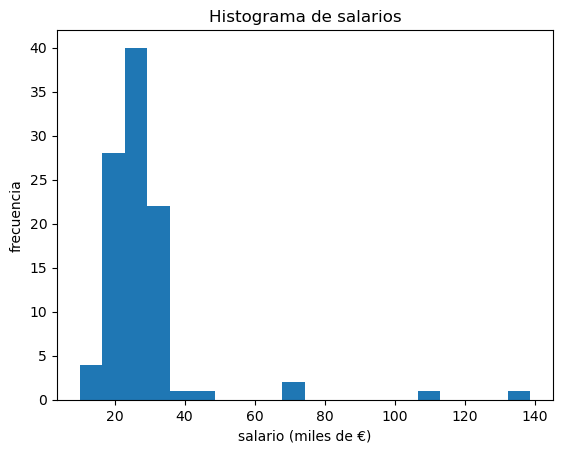

In [21]:

plt.figure()
plt.hist(serie, bins=20)
plt.title("Histograma de salarios")
plt.xlabel("salario (miles de €)"); plt.ylabel("frecuencia")
plt.show()



### Ejercicio 3

1. Cambia el número de `bins` (por ejemplo 10, 30, 50).
2. Observa cómo cambia el aspecto del histograma.
3. ¿En qué caso te parece más fácil interpretar la distribución?


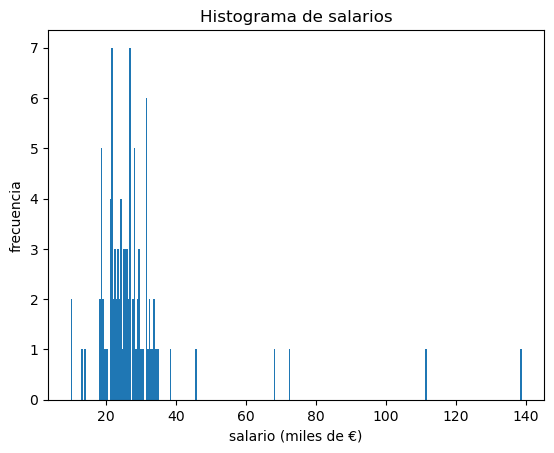

In [ ]:

plt.figure()
plt.hist(serie, bins=30)
plt.title("Histograma de salarios")
plt.xlabel("salario (miles de €)"); plt.ylabel("frecuencia")
plt.show()



## 4. Muestra vs población e intervalos de confianza

En la práctica, no podemos observar a **toda la población**, solo una **muestra**.

Un **intervalo de confianza (IC)** para la media nos da un rango donde creemos que está la verdadera media poblacional con cierta confianza (por ejemplo, 95%).

Para muestras grandes y desconocida la desviación poblacional, un IC aproximado al 95% es:

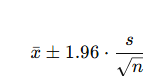

donde:
- \(\bar{x}\) = media muestral
- \(s\) = desviación estándar muestral
- \(n\) = tamaño de la muestra


In [39]:

m = serie.mean()
s = serie.std(ddof=1)
n = len(serie)
se = s / np.sqrt(n)  # error estándar
z = 1.96
ic_low, ic_high = m - z*se, m + z*se

print(f"Media muestral ≈ {m:.2f}")
print(f"IC 95% de la media ≈ [{ic_low:.2f}, {ic_high:.2f}]")


Media muestral ≈ 28.48
IC 95% de la media ≈ [25.27, 31.69]



### Ejercicio 4

1. Extrae una **submuestra** de 30 salarios (`serie.sample(30, random_state=123)`).
2. Calcula su media, desviación y el IC 95%.
3. Compáralo con el IC de la muestra completa.

Reflexiona: ¿es más ancho el intervalo? ¿Por qué?


In [40]:
rng = serie.sample(30, random_state=123)
m = rng.mean()
s = rng.std(ddof=1)
n = len(rng)
se = s / np.sqrt(n)  # error estándar
z = 1.95
ic_low, ic_high = m - z*se, m + z*se

print(f"Media muestral ≈ {m:.2f}")
print(f"IC 96% de la media ≈ [{ic_low:.2f}, {ic_high:.2f}]")


Media muestral ≈ 29.12
IC 96% de la media ≈ [21.63, 36.60]



## 5. Correlación

La **correlación** mide la fuerza y dirección de la relación lineal entre dos variables.

- Correlación de Pearson \(r\) entre -1 y 1.
  - \(r \approx 1\): relación lineal positiva fuerte.
  - \(r \approx -1\): relación lineal negativa fuerte.
  - \(r \approx 0\): poca o ninguna relación lineal.

En Data Science: sirve para ver qué variables se relacionan entre sí (feature selection básica, análisis exploratorio).

Correlación Pearson horas_estudio vs nota = 0.901


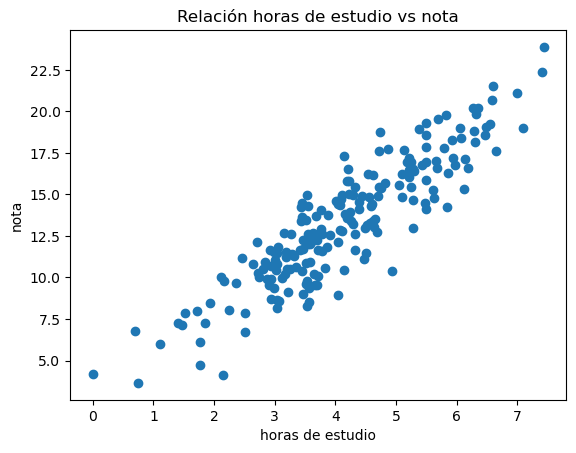

In [ ]:

# Dataset sintético: horas de estudio y nota
rng = np.random.default_rng(123)
N = 200
horas_estudio = rng.normal(4, 1.5, size=N).clip(0, None)
ruido = rng.normal(0, 1.5, size=N)
nota = 2.5*horas_estudio + 3 + ruido

df = pd.DataFrame({"horas_estudio": horas_estudio, "nota": nota})

corr = df["horas_estudio"].corr(df["nota"])
print("Correlación Pearson horas_estudio vs nota =", round(corr, 3))

plt.figure()
plt.scatter(df["horas_estudio"], df["nota"])
plt.title("Relación horas de estudio vs nota")
plt.xlabel("horas de estudio"); plt.ylabel("nota")
plt.show()



### Ejercicio 5

1. Prueba a crear otra variable `ruido_fuerte = ruido*3` y a definir `nota2 = 2.5*horas_estudio + 3 + ruido_fuerte`.
2. Calcula la correlación entre `horas_estudio` y `nota2`.
3. ¿Qué ocurre cuando aumenta el ruido?


Correlación Pearson horas_estudio vs nota = 0.566


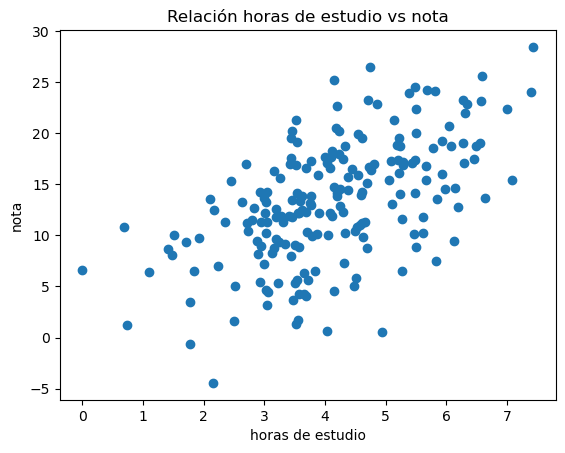

In [44]:

# Dataset sintético: horas de estudio y nota
rng = np.random.default_rng(123)
N = 200
horas_estudio = rng.normal(4, 1.5, size=N).clip(0, None)
ruido_fuerte = ruido*3
ruido = rng.normal(0, 1.5, size=N)
nota = 2.5*horas_estudio + 3 + ruido
nota2 = 2.5*horas_estudio + 3 + ruido_fuerte

df = pd.DataFrame({"horas_estudio": horas_estudio, "nota": nota2})

corr = df["horas_estudio"].corr(df["nota"])
print("Correlación Pearson horas_estudio vs nota =", round(corr, 3))

plt.figure()
plt.scatter(df["horas_estudio"], df["nota"])
plt.title("Relación horas de estudio vs nota")
plt.xlabel("horas de estudio"); plt.ylabel("nota")
plt.show()


## 6. Regresión lineal simple (OLS)

La **regresión lineal simple** modela la relación entre una variable explicativa \(x\) y una variable objetivo \(y\) mediante una recta:

\[
y \approx a x + b
\]

Queremos encontrar los parámetros \(a\) (pendiente) y \(b\) (intercepto) que minimizan el **Error Cuadrático Medio (MSE)**.

En forma matricial, la solución de mínimos cuadrados ordinarios (OLS) es:

\[
\mathbf{w} = (X^T X)^{-1} X^T y
\]

donde \(X\) incluye una columna de 1s para el intercepto.


Modelo estimado: nota ≈ 2.477 * horas + 3.018
MSE OLS: 23.946


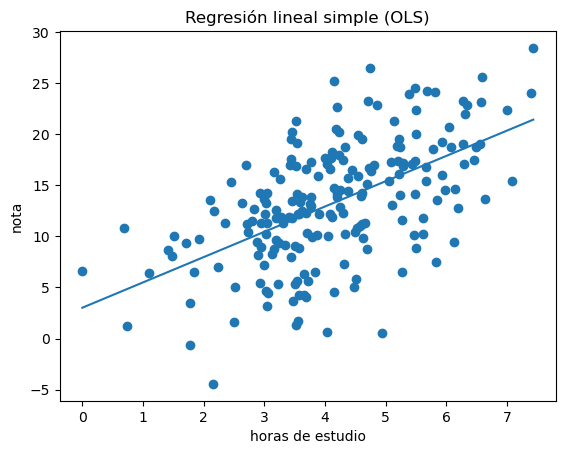

In [45]:

# Construimos la matriz X (columna de 1s + horas_estudio)
X = np.c_[np.ones(len(df)), df["horas_estudio"].values]
y = df["nota"].values.reshape(-1, 1)

# Fórmula cerrada OLS
w = np.linalg.inv(X.T @ X) @ X.T @ y
b_hat, a_hat = float(w[0, 0]), float(w[1, 0])
print(f"Modelo estimado: nota ≈ {a_hat:.3f} * horas + {b_hat:.3f}")

y_hat = (X @ w).ravel()
mse = np.mean((df["nota"].values - y_hat)**2)
print("MSE OLS:", round(mse, 3))

plt.figure()
plt.scatter(df["horas_estudio"], df["nota"])
x_line = np.linspace(df["horas_estudio"].min(), df["horas_estudio"].max(), 100)
y_line = a_hat * x_line + b_hat
plt.plot(x_line, y_line)
plt.title("Regresión lineal simple (OLS)")
plt.xlabel("horas de estudio"); plt.ylabel("nota")
plt.show()



### Ejercicio 6

1. Añade un par de puntos extremos al dataset (por ejemplo, un alumno que estudia 0 horas y saca un 10, u otro que estudia 10 horas y saca un 0).
2. Vuelve a ajustar el modelo OLS.
3. Observa cómo cambia la recta y la correlación.

Reflexiona: los **outliers** pueden tener un gran efecto en la regresión.


Modelo estimado: nota ≈ 1.378 * horas + 7.285
MSE OLS: 32.051


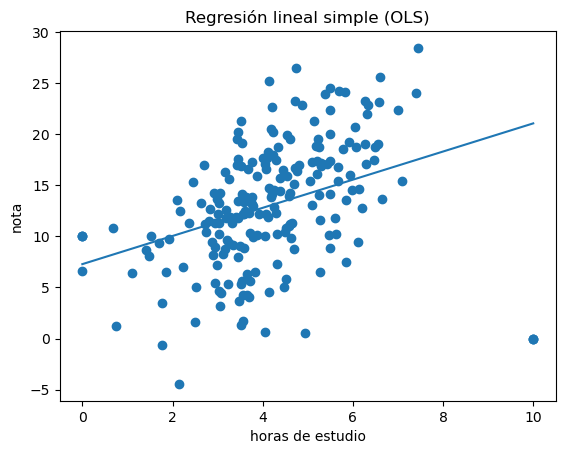

In [48]:
# 1. Añadimos puntos extremos (outliers)
outliers = pd.DataFrame({
    "horas_estudio": [0, 10],
    "nota": [10, 0]
})
df = pd.concat([df, outliers], ignore_index=True)

# Construimos la matriz X (columna de 1s + horas_estudio)
X = np.c_[np.ones(len(df)), df["horas_estudio"].values]
y = df["nota"].values.reshape(-1, 1)

# Fórmula cerrada OLS
w = np.linalg.inv(X.T @ X) @ X.T @ y
b_hat, a_hat = float(w[0, 0]), float(w[1, 0])
print(f"Modelo estimado: nota ≈ {a_hat:.3f} * horas + {b_hat:.3f}")

y_hat = (X @ w).ravel() 
mse = np.mean((df["nota"].values - y_hat)**2)
print("MSE OLS:", round(mse, 3))

plt.figure()
plt.scatter(df["horas_estudio"], df["nota"])
x_line = np.linspace(df["horas_estudio"].min(), df["horas_estudio"].max(), 100)
y_line = a_hat * x_line + b_hat
plt.plot(x_line, y_line)
plt.title("Regresión lineal simple (OLS)")
plt.xlabel("horas de estudio"); plt.ylabel("nota")
plt.show()


---

Con este notebook tienes una base sólida de:
- Resumen de datos (media, mediana, desviación).
- Visualización básica.
- Intervalos de confianza de la media.
- Correlación.
- Regresión lineal simple.

Todo ello es fundamental para interpretar resultados en Data Science.
